In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

11490434/11490434 [==============================] - 1s 0us/step


60000

In [9]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

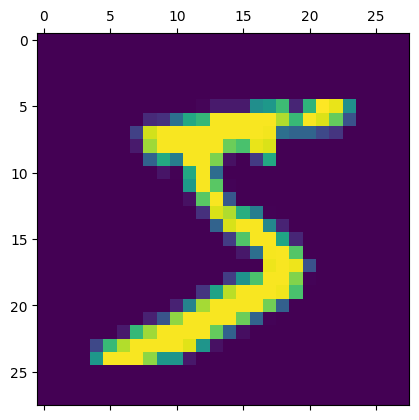

In [14]:
plt.matshow(X_train[0])

In [18]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [21]:
X_train_flatten.shape

(60000, 784)

In [22]:
X_test_flatten.shape

(10000, 784)

In [23]:
# Create simple neural network

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

In [28]:
X_train_flatten = X_train_flatten / 255
X_test_flatten = X_test_flatten / 255

In [29]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 348us/step - loss: 0.3981 - accuracy: 0.9024
Epoch 2/5
1875/1875 [==============================] - 1s 342us/step - loss: 0.2886 - accuracy: 0.9196
Epoch 3/5
1875/1875 [==============================] - 1s 334us/step - loss: 0.2731 - accuracy: 0.9235
Epoch 4/5
1875/1875 [==============================] - 1s 334us/step - loss: 0.2655 - accuracy: 0.9258
Epoch 5/5
1875/1875 [==============================] - 1s 346us/step - loss: 0.2603 - accuracy: 0.9275


In [30]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 270us/step - loss: 0.2644 - accuracy: 0.9271


[0.26443642377853394, 0.9271000027656555]

In [31]:
y_predicted = model.predict(X_test_flatten)
y_predicted[1]

313/313 [==============================] - 0s 238us/step


array([4.1939929e-01, 9.1977781e-03, 9.9968696e-01, 4.5347798e-01,
       4.5306217e-10, 8.7525761e-01, 9.5773625e-01, 2.6655861e-13,
       1.3873567e-01, 1.1898116e-09], dtype=float32)

In [32]:
np.argmax(y_predicted[1])

2

In [33]:
y_test[1]

2

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
confustion_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
confustion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    1,    2,    0,    6,   15,    3,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  922,   20,    8,    5,   14,    9,   39,    3],
       [   1,    0,   14,  929,    1,   24,    3,    9,   21,    8],
       [   1,    1,    3,    2,  916,    0,   13,    3,    9,   34],
       [   7,    3,    2,   36,    6,  775,   21,    4,   32,    6],
       [   6,    3,    4,    1,    7,    7,  927,    2,    1,    0],
       [   1,    6,   22,    8,    8,    1,    0,  938,    4,   40],
       [   3,   11,    6,   21,    9,   24,   10,    6,  877,    7],
       [   7,    8,    1,   11,   28,    5,    1,   12,   12,  924]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

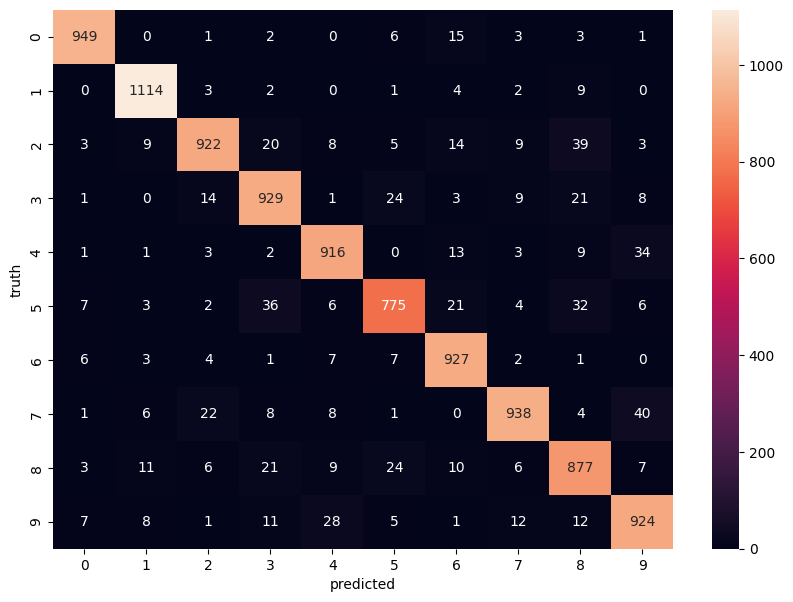

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confustion_mat, annot= True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 473us/step - loss: 0.2688 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 1s 470us/step - loss: 0.1240 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 1s 477us/step - loss: 0.0875 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 1s 468us/step - loss: 0.0669 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 1s 476us/step - loss: 0.0520 - accuracy: 0.9847


In [42]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 370us/step - loss: 0.0831 - accuracy: 0.9754


[0.08305081725120544, 0.9753999710083008]

In [46]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confustion_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
confustion_mat

313/313 [==============================] - 0s 355us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    0,    0,    1,    3,    2,    2,    0],
       [   0, 1123,    4,    0,    0,    1,    2,    0,    5,    0],
       [   6,    4,  986,    8,    6,    0,    4,    8,    7,    3],
       [   0,    0,    1,  994,    0,    1,    0,    7,    4,    3],
       [   3,    0,    3,    1,  957,    0,    4,    3,    0,   11],
       [   2,    0,    0,    9,    1,  862,    4,    3,    8,    3],
       [   5,    3,    1,    1,    1,    4,  939,    0,    4,    0],
       [   2,    4,    7,    2,    0,    0,    0, 1008,    1,    4],
       [   7,    0,    1,    5,    5,    4,    3,    4,  942,    3],
       [   1,    4,    0,    9,    9,    3,    0,    8,    2,  973]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

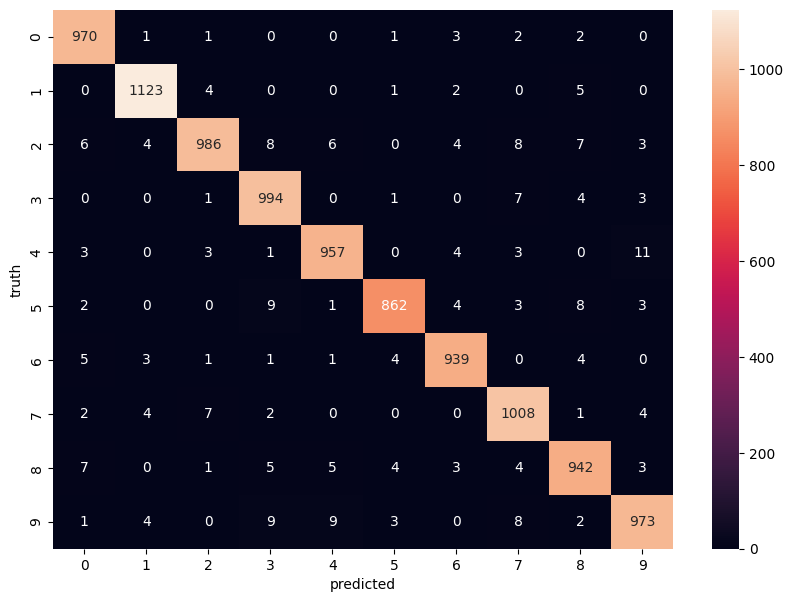

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confustion_mat, annot= True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 488us/step - loss: 2.7721 - accuracy: 0.8502
Epoch 2/5
1875/1875 [==============================] - 1s 474us/step - loss: 0.3830 - accuracy: 0.9079
Epoch 3/5
1875/1875 [==============================] - 1s 487us/step - loss: 0.2889 - accuracy: 0.9249
Epoch 4/5
1875/1875 [==============================] - 1s 537us/step - loss: 0.2566 - accuracy: 0.9355
Epoch 5/5
1875/1875 [==============================] - 1s 530us/step - loss: 0.2292 - accuracy: 0.9410
